4.1 Data Preparation


In [ ]:
!pip uninstall tensorflow -y
!pip uninstall keras -y
!pip install keras==2.9.0
!pip install tensorflow==2.9.0

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Successfully uninstalled tensorflow-2.13.0
Found existing installation: keras 2.13.1
Uninstalling keras-2.13.1:
  Successfully uninstalled keras-2.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 43.8 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
  

In [ ]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.9.0
2.9.0


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [ ]:
!pwd
!unzip face_mini.zip

/content
Archive:  face_mini.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of face_mini.zip or
        face_mini.zip.zip, and cannot find face_mini.zip.ZIP, period.


In [ ]:
!pwd

/content


1793 961 449


1793 961 449


(-0.5, 69.5, 69.5, -0.5)

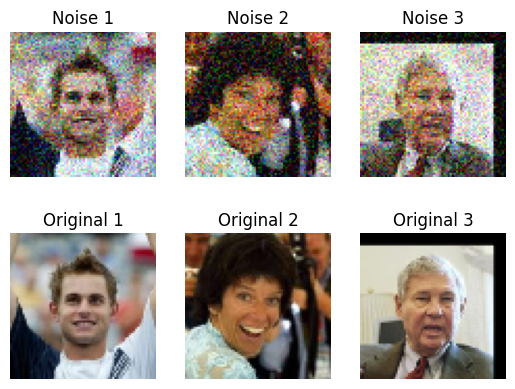

In [ ]:
import matplotlib.pyplot as plt

imgs = []

img_h, img_w = 70, 70
for fname in glob.glob('/content/*/*.jpg'):
    target_size = (img_h,img_w)
    img = image.load_img(fname, target_size=target_size, interpolation="nearest") # target_size ไม่ควรเกิน (100,100)
    img = img_to_array(img)
    img = img/255
    imgs.append(img)

train_x, test_x = train_test_split(imgs, random_state=42, test_size=0.3)
train_x, val_x = train_test_split(train_x, random_state=42, test_size=0.2)
print(len(train_x),len(test_x),len(val_x))
noise_mean = 0
noise_std = 0.5
noise_factor = 0.3

train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=imgs[0].shape) )
val_x_noise = val_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=imgs[0].shape) )
test_x_noise = test_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=imgs[0].shape) )
print(len(train_x_noise),len(test_x_noise),len(val_x_noise))

plt.subplot(231)
plt.imshow(train_x_noise[0])
plt.title('Noise 1')
plt.axis('off')

plt.subplot(232)
plt.imshow(train_x_noise[1])
plt.title('Noise 2')
plt.axis('off')

plt.subplot(233)
plt.imshow(train_x_noise[2])
plt.title('Noise 3')
plt.axis('off')

plt.subplot(234)
plt.imshow(train_x[0])
plt.title('Original 1')
plt.axis('off')

plt.subplot(235)
plt.imshow(train_x[1])
plt.title('Original 2')
plt.axis('off')

plt.subplot(236)
plt.imshow(train_x[2])
plt.title('Original 3')
plt.axis('off')

4.2 Autoencoder Model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 70, 70, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 70, 70, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 70, 70, 128)       295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 35, 35, 64)        36928     
                                                             

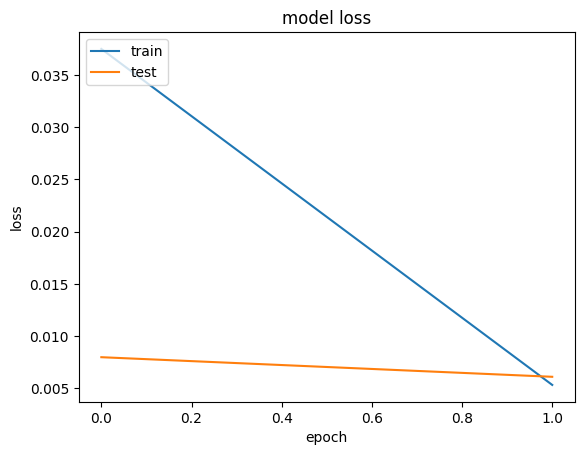

<Figure size 640x480 with 0 Axes>

In [ ]:
train_x, test_x = train_test_split(imgs, random_state=42, test_size=0.3)
train_x, val_x = train_test_split(train_x, random_state=42, test_size=0.2)

train_x = np.array(train_x)
test_x = np.array(test_x)
val_x = np.array(val_x)

noise_mean = 0
noise_std = 0.5
noise_factor = 0.3

train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=imgs[0].shape) )
val_x_noise = val_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=imgs[0].shape) )
test_x_noise = test_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=imgs[0].shape) )

# 4.2 AutoEncoder

# Encoder

Input_img = Input(shape=(img_h, img_w, 3))

# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)

# Layer 3
x3 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x2)

# Layer 4
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 5
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)

# Decoder

# Layer 6
x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)

# Layer 7
x6 = UpSampling2D(size=(2, 2))(x5)

# Layer 8
x7 = Conv2D(256, (3, 3), activation='relu', padding='same')(x6)

# Layer 9
decoded_img = Conv2D(3, (3, 3), activation='relu', padding='same')(x7)

autoencoder = Model(Input_img, decoded_img)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

# Training params

epoch = 2 # 2,4,8,16
batch_size = 16 # [16,32,64,128]

# Training

callback = EarlyStopping(monitor='loss', patience=3)

history = autoencoder.fit(train_x_noise, train_x, epochs=epoch, batch_size=batch_size, shuffle=True, validation_data=(val_x_noise, val_x), callbacks=[callback],verbose=1)

predictions_test = autoencoder.predict(test_x_noise)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.savefig('Loss_graph.jpg')

4.3 Hyperparameter Tuning

In [ ]:
imgs = []
Input_img = Input(shape=(img_h, img_w, 3))
def create_autoencoder(optimizer='adam', learning_rate=0.001, batch_size=16, epochs=2):
    model = tf.keras.Sequential()
    # Layer 1
    x1 = Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(80, 80, 3))(Input_img)

    # Layer 2
    x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
    x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

    # Layer 3
    x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

    # Layer 4
    x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

    x6 = UpSampling2D((2, 2))(x5)

    x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)

    x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

    x9 = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model
for jpg_file in glob.glob('/content/*/*.jpg'):
  # print(jpg_file)
  image = tf.keras.utils.load_img(jpg_file,
    grayscale=False,
    color_mode="rgb",
    target_size=(100,100),
    interpolation="nearest",
    keep_aspect_ratio=False,)
  img = tf.keras.utils.img_to_array(image)
  img = img/255
  imgs.append(img)

train_x, test_x = train_test_split(imgs, random_state=0, test_size=0.3)
train_x, val_x = train_test_split(train_x, random_state=0, test_size=0.2)

train_x = np.array(train_x)
test_x = np.array(test_x)
val_x = np.array(val_x)
noise_mean = 0
noise_std = 1
noise_factor = 0.2
train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=(100,100,3)) )
val_x_noise = val_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=(100,100,3)) )
test_x_noise = test_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=(100,100,3)) )

from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=create_autoencoder, epochs=2, batch_size=16, verbose=0)
opts = ['adam', 'sgd']  # Add more optimizers as needed
lnR = [0.0001]  # Learning rates to experiment with
bs = [2, 32]  # Batch sizes to experiment with
eps = [300, 400]  # Number of epochs to experiment with


param_grid = dict(batch_size=bs, epochs=eps, optimizer=opts, learning_rate=lnR)

grid = GridSearchCV(estimator=model, verbose=10,cv=4, param_grid=param_grid)

# Run the grid search
grid_result = grid.fit(train_x_noise, train_x)

# Display the best parameters and best score
best_params = grid_result.best_params_
best_score = grid_result.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Display mean and standard deviation of scores for each set of hyperparameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"Mean: {mean}, Std: {std}, Params: {param}")

e = grid_result.best_params_['epochs']
b = grid_result.best_params_['batch_size']
o = grid_result.best_params_['optimizer']
l = grid_result.best_params_['learning_rate']
autoencoder = Model(Input_img, decoded_img)
autoencoder.compile(optimizer=o, loss='mse')

callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(train_x_noise, train_x, epochs=e, batch_size=b, shuffle=True, validation_data=(val_x_noise, val_x), callbacks=[callback])

test_predictions = autoencoder.predict(test_x_noise)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


NameError: ignored